In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
with open('../results/2022-10-18_20:38:54_results.json') as f:
    data = json.load(f)

In [16]:
loss0 = (data[0]['results']['total']['training_losses'][0])
total = 0
for i in range(len(loss0) - 1):
    if loss0[i+1] > loss0[i]:
        total += 1
print(total)

1227


In [29]:
for d in data:
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    r2_train = results['total']['r2score_train']
    print('train', '{0:.4}'.format(np.mean(r2_train)) + '\\pm {0:.3}'.format(np.std(r2_train)))
    print('val', '{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

train 0.9831\pm 0.000128
val 0.9798\pm 0.000231
train 0.9878\pm 0.000105
val 0.9727\pm 0.000267
train 0.9928\pm 0.000142
val 0.9624\pm 0.000656


In [18]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['r2score_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [19]:
def formatinfo(vals, obj):
    print('''
        \\begin{table*}[htp!]
        \centering
         \\begin{tabular}{|c |c c c|} 
         \hline
         & Depth 4 & Depth 5 & Depth 6 \\\\
         \hline
         Width 50 & %s & %s & %s \\\\
         Width 75 & %s & %s & %s \\\\
         Width 100 & %s & %s & %s \\\\
         \hline
         \end{tabular}
         \caption{\label{tab:valr2}Aggregated validation set $R^2$ scores.}
        \end{table*}
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))

In [20]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [21]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

KeyError: 50

In [22]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    
    if width == 50:
        main = orange
    if width == 75:
        main = green
    if width == 100:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

UnboundLocalError: local variable 'main' referenced before assignment

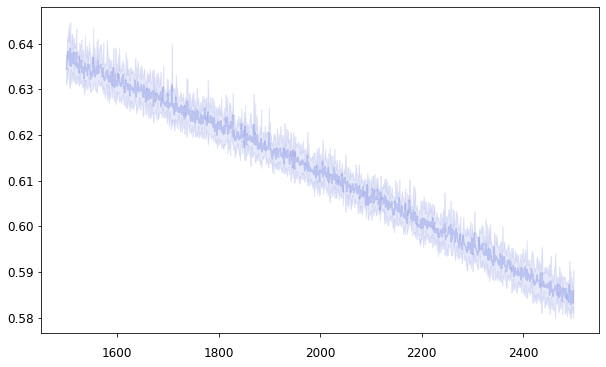

In [23]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))
epochs = list(range(1500, 2500))

plt.rc('font', **{'size': 12})

for d in data:
    depth = d['configs']['depth']
    width = d['configs']['width']
    losses = d['results']['total']['training_losses']
    means = np.mean(losses, axis=0)[-1000:]
    ax.plot(
        epochs, np.mean(d['results']['total']['training_losses'], axis=0)[-1000:],
        color=compute_color(depth, width),
        label=f'Depth {depth}, width {width}'
    )
    stds = np.std(losses, axis=0)[-1000:]
    ax.fill_between(epochs, means-stds, means+stds, color=compute_color(depth, width, alpha=0.5), edgecolor="none")
    
ax.set_ylim(0.5, 0.73)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
#plt.legend(bbox_to_anchor=(1.,0.5), ncol=3, loc='upper left')
plt.legend(ncol=3, loc='lower left')
ax.set_title('Training losses')
# plt.subplots_adjust(right=.2)
plt.savefig('training_losses.png', dpi=400)
plt.show()

In [24]:
# mapes
for d in data:
    configs = d['configs']
    print(configs)
    depth = configs['depth']; width = configs['width']
    
    results = d['results']
    for i in range(1, 7):
        print(f'OBJ{i}')
        obj_results = results['by_response'][f'OBJ{i}']
        print('train:', np.mean(obj_results['mape_train']))
        print('val:', np.mean(obj_results['mape_val']))

{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 100, 'batchsize': 1024}
OBJ1
train: 0.014539373781345063
val: 0.01609876930354372
OBJ2
train: 0.017491479861335108
val: 0.018176665591830492
OBJ3
train: 0.013933512056986896
val: 0.01432303912524283
OBJ4
train: 0.0765090580084176
val: 0.07788904277202675
OBJ5
train: 0.11021540963849322
val: 0.11706191656713723
OBJ6
train: 0.11214473570911591
val: 0.11852385241941414
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function': 'mse', 'n_epochs': 2500, 'width': 150, 'batchsize': 1024}
OBJ1
train: 0.015954700958104053
val: 0.019139787750525262
OBJ2
train: 0.01606617237311952
val: 0.019080301601917475
OBJ3
train: 0.016941006062764424
val: 0.018000743052470854
OBJ4
train: 0.08528490644802776
val: 0.08735698085205118
OBJ5
train: 0.08991473101509037
val: 0.1277427046011553
OBJ6
train: 0.09119323403615429
val: 0.12727090862760126
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'loss_function'